# Titanic data set: EDA and Machine learning 


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Lets build a predictive model that answers the question: “what sorts of people were more likely to survive?” This is same as in predicting whether a team win or did not win, you passed the test or did not pass the test, you were accepted or not accepted. This is called classification problem. 

In [1]:
## Importing the library

# For data manipulation and preprocessing 
import pandas as pd
import numpy as np

# For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Model Algorithm
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Importing dataset 

Data set is given with train and test set separated. Data data is available [here](https://www.kaggle.com/c/titanic/data). 

The data has been split into two groups:
* Training set (train.csv)
* Test set (test.csv)

To begin this step, we first import our data. Next we use the info()  function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). Click here for the [Source Data Dictionary.](https://www.kaggle.com/c/titanic/data)


1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
The Age and Fare variable are continuous quantitative datatypes.
6. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. 
7. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
8. The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.



In [2]:
titanic_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA Set/titanic_train.csv')
titanic_test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA Set/titanic_test.csv')
titanic_test["Survived"] = np.NaN
titanic_train["train"]  = "Yes"
titanic_test["train"] = "No"
titanic = pd.concat([titanic_train, titanic_test]).reset_index()




## Data Cleaning 

The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
In this stage, we will clean our data by: 
1. correcting aberrant values and outliers,
2. completing missing information, 
3. creating new features for analysis 
4. converting fields to the correct format for calculations and presentation.





In [3]:
print('Train data with null values:')
titanic_train.isna().sum()
print('_' * 100)
print('Test data with null values:')
titanic_test.isna().sum()

titanic.describe(include = 'all')


Train data with null values:
____________________________________________________________________________________________________
Test data with null values:


,index,PassengerId,Survived,Pclass,Name,Sex,Age,Sibling/Spouse,Parents/child,Ticket,Fare,Cabin,Embarked,train
count,1309.000000,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309
unique,NaN,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,2
top,NaN,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,Yes
freq,NaN,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,891
mean,369.478992,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN
std,248.767105,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN
min,0.000000,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,163.000000,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,327.000000,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,563.000000,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN


In [4]:
# Now cleaning the data 
#1 Filling the missing age columns with the median of the age column
titanic.loc[:,'Age'].fillna(titanic['Age'].median(), inplace = True)
#2 Filling th eembarked column with the mode value 
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0] , inplace = True)
# 3 fill the missing fare with median 
titanic['Fare'].fillna(titanic['Fare'].median(), inplace = True)

# 4 dropping the Ticket, Cabin column as no info can be extracted from it  
titanic.drop([ 'Ticket'], axis = 1, inplace = True)

# 5 Checking for null values 
titanic.isna().sum()

index                0
PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
Sibling/Spouse       0
Parents/child        0
Fare                 0
Cabin             1014
Embarked             0
train                0
dtype: int64

## Feature engineering in titanic dataset 


In [5]:
titanic['family_len'] = 1 + titanic['Sibling/Spouse'] + titanic['Parents/child']
titanic['IsAlone'] = titanic['family_len'].apply(lambda a: 1 if a == 1 else 0)

# Extracting the name salutation 
titanic['title'] = titanic.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['title'].replace(['Mlle','Mme','Ms','Dr',    'Major','Lady','the Countess','Jonkheer','Col',
                                               'Rev','Capt','Sir','Don', 'Dona', 'Master'],
                                  ['Miss','Mrs','Mrs','Other','Other','Mrs',  'Other',     'Other','Other','Other',
                                               'Other','Other','Mr', 'Mrs', 'Master'], inplace = True)
titanic.title.value_counts()

# categorizing the fare columns
titanic['Fare_level'] = pd.qcut(titanic['Fare'], 4)

# Categorizing the age into 4 categories
# pd.qcut(titanic['Age'], 4) # divide the data set in a way that each interval contain equal number of dataset. 
# pd.cut(titanic['Age'] ,4) # divide the data set in equal length of interval. 
titanic['Age_category'] = pd.cut(titanic['Age'].astype(int), 4)

### Label encoder 

In [6]:
# Encoding the categorical column
label = LabelEncoder()
titanic['Age_category'] = label.fit_transform(titanic['Age_category'])
titanic['Embarked_code'] = label.fit_transform(titanic['Embarked'])
titanic['Fare_level'] = label.fit_transform(titanic['Fare_level'])
titanic['title_code'] = label.fit_transform(titanic['title'])
titanic['Sex_code'] = label.fit_transform(titanic['Sex'])
titanic.head(10)
titanic['Age_code'] = titanic['Age_category']
titanic['Age_category'].replace({0: 'Child', 1: 'Adult', 2: 'Mid age', 3: 'Old'}, inplace = True)
titanic

,index,PassengerId,Survived,Pclass,Name,Sex,Age,Sibling/Spouse,Parents/child,Fare,...,train,family_len,IsAlone,title,Fare_level,Age_category,Embarked_code,title_code,Sex_code,Age_code
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,...,Yes,2,0,Mr,0,Adult,2,2,1,1
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,...,Yes,2,0,Mrs,3,Adult,0,3,0,1
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,...,Yes,1,1,Miss,1,Adult,2,1,0,1
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,...,Yes,2,0,Mrs,3,Adult,2,3,0,1
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,...,Yes,1,1,Mr,1,Adult,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,8.0500,...,No,1,1,Mr,1,Adult,2,2,1,1
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,...,No,1,1,Mrs,3,Adult,0,3,0,1
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,...,No,1,1,Mr,0,Adult,2,2,1,1
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,...,No,1,1,Mr,1,Adult,2,2,1,1


In [7]:
# checking for the missing values 
titanic.isna().sum()
titanic.drop(['Name','index'], axis = 1, inplace = True)
titanic.describe(include = 'all')
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Sibling/Spouse,Parents/child,Fare,Cabin,Embarked,train,family_len,IsAlone,title,Fare_level,Age_category,Embarked_code,title_code,Sex_code,Age_code
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S,Yes,2,0,Mr,0,Adult,2,2,1,1
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C,Yes,2,0,Mrs,3,Adult,0,3,0,1
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S,Yes,1,1,Miss,1,Adult,2,1,0,1
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S,Yes,2,0,Mrs,3,Adult,2,3,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S,Yes,1,1,Mr,1,Adult,2,2,1,1


In [8]:
titanic.head()
# Replacing 1 with survived and 0 with not survived  in survived column
titanic['Survived_code'] = titanic['Survived']
titanic.replace({'Survived': {1: "Survived", 0: "Not survived"}}, inplace = True)


# Looking onto the layout of the ship it was found that cabin on top floor was A and on the bottom most floor was G. So, the first letter of cabin column will give the floor on which the the cabin was loacated.  

len(titanic)


1309

## EDA



Before EDA calculating few terms:
1. Finding the unique values
2. number of unique values 
3. count of each unique values 


In [9]:
# 1
titanic.apply(lambda a: a.unique(), axis = 0)


PassengerId       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                              [Not survived, Survived, nan]
Pclass                                                    [3, 1, 2]
Sex                                                  [male, female]
Age               [22.0, 38.0, 26.0, 35.0, 28.0, 54.0, 2.0, 27.0...
Sibling/Spouse                                [1, 0, 3, 4, 2, 5, 8]
Parents/child                              [0, 1, 2, 5, 3, 4, 6, 9]
Fare              [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin             [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                                  [S, C, Q]
train                                                     [Yes, No]
family_len                             [2, 1, 5, 3, 7, 6, 4, 8, 11]
IsAlone                                                      [0, 1]
title                                [Mr, Mrs, Miss, Master, Other]
Fare_level                                      

In [10]:
# 2
titanic.nunique(axis = 0)

for i in titanic.columns:
    print(titanic[i].value_counts())
    print("________________________________________________________")


1       1
861     1
879     1
878     1
877     1
       ..
436     1
435     1
434     1
433     1
1309    1
Name: PassengerId, Length: 1309, dtype: int64
________________________________________________________
Not survived    549
Survived        342
Name: Survived, dtype: int64
________________________________________________________
3    709
1    323
2    277
Name: Pclass, dtype: int64
________________________________________________________
male      843
female    466
Name: Sex, dtype: int64
________________________________________________________
28.0    295
24.0     47
22.0     43
21.0     41
30.0     40
       ... 
23.5      1
70.5      1
55.5      1
20.5      1
38.5      1
Name: Age, Length: 98, dtype: int64
________________________________________________________
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: Sibling/Spouse, dtype: int64
________________________________________________________
0    1002
1     170
2     113
3       8
5       6
4       6
6

In [11]:
# EDA on training dataset 
titanic_train = titanic[titanic["train"] == "Yes"]

plt.style.use('ggplot')
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Sibling/Spouse',
       'Parents/child', 'Fare', 'Cabin', 'Embarked', 'train', 'family_len',
       'IsAlone', 'title', 'Fare_level', 'Age_category', 'Embarked_code',
       'title_code', 'Sex_code', 'Age_code', 'Survived_code'],
      dtype='object')



Between childern (0 - 20 yrs) and old (60 and above) , child has better chance of survival. The chances would higher if they fall in the age of (0-5 years).



Not survived    549
Survived        342
Name: Survived, dtype: int64

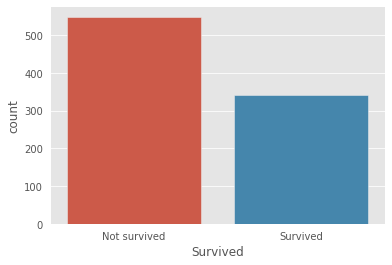

In [12]:
# Calculating number of survived and not survived passenger 
sns.countplot(data = titanic, x = 'Survived')
titanic.Survived.value_counts()
# Not survived    549
# Survived        342

Text(0, 0.5, 'Age')

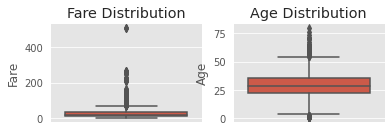

In [13]:
# Looking at the fare distribution 
plt.subplot(221)
sns.boxplot(data = titanic_train, y = 'Fare')
plt.title('Fare Distribution')
plt.ylabel('Fare');


plt.subplot(222)
sns.boxplot(y = titanic.Age)
plt.title("Age Distribution")
plt.ylabel('Age')


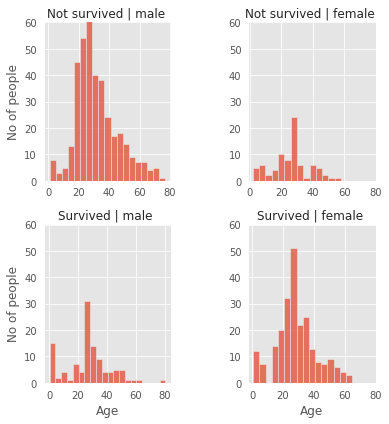

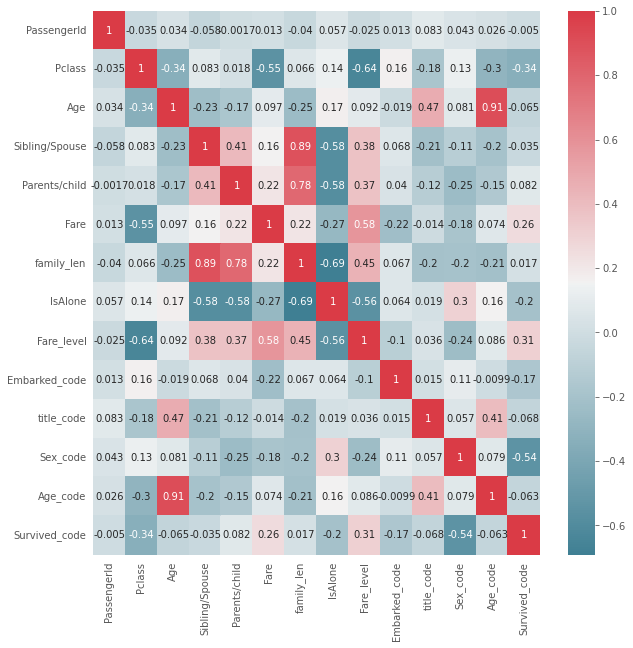

In [14]:
titanic_survived = titanic[titanic['Survived'] == 'Survived']

g = sns.FacetGrid(titanic_train, row = "Survived", col = "Sex", sharex = False, sharey = False)
g.map_dataframe(sns.histplot, x = "Age", binwidth = 4 )
g.set_axis_labels("Age","No of people")
g.set_titles(col_template="{col_name} ", row_template="{row_name}")
g.set(xticks = [0,20,40,60,80], ylim = (0,60));


plt.figure(figsize = (10,10))
sns.heatmap(titanic_train.corr(), annot= True, cmap = sns.diverging_palette(220, 10, as_cmap = True) );

In [15]:
titanic_train['Sex'].unique()
titanic_train["Sex"].value_counts()
titanic_train["Survived"].value_counts()

titanic_train_male = titanic_train[titanic_train['Sex'] == "male"]
titanic_train_female = titanic_train[titanic_train['Sex'] == "female"]
titanic_train_female["Survived"].value_counts()
titanic_train_male["Survived"].value_counts()
titanic_train_survived = titanic_train[titanic_train["Survived"] == "Survived"]

titanic_train.columns
titanic_train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

how Survival rate depends on the class of the passenger and gender category

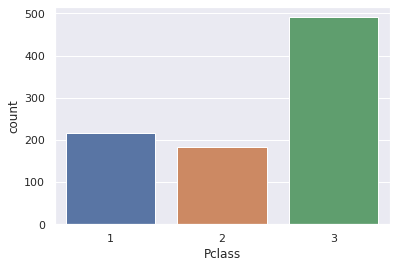

In [26]:
# here we will draw the bar plot.  Class on x-axis is categorical 
sns.set_theme(style="darkgrid")
sns.countplot(data = titanic_train, x = "Pclass", order = (1,2,3));



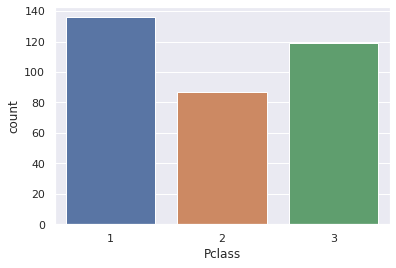

In [27]:
sns.countplot(data = titanic_train_survived, x = "Pclass", order = (1,2,3));


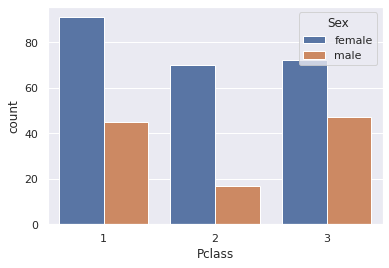

In [28]:
sns.countplot(data = titanic_train_survived, x = "Pclass", hue = "Sex",order = (1,2,3));


From above chart it follwing can be conculded:
1. Female passenger of first class had higher chance of survival among all the categories.
2. Over all Females had higher chance of survival as compared to males in any class. 


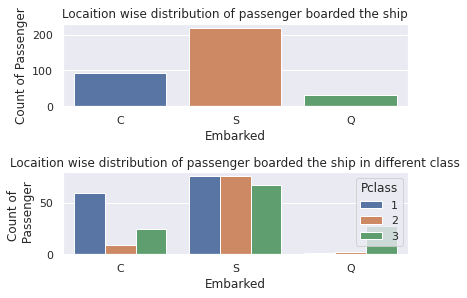

In [18]:
plt.subplot(211)
sns.countplot(data = titanic_train_survived, x = "Embarked");
plt.title('Locaition wise distribution of passenger boarded the ship')
plt.ylabel('Count of Passenger')
plt.subplot(212)
sns.countplot(data = titanic_train_survived, x = "Embarked", hue = "Pclass", hue_order=(1,2,3)); # Queenstown had almost all passenger from from third class and it shows that that it has less chance of survival. Less economic variation can be seen here. 
plt.title('Locaition wise distribution of passenger boarded the ship in different class')
plt.ylabel('Count of \n Passenger')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
# One can conclude that Southampton (S) is largest port among the three as most people emabarked from this port, followed by Cherbourge and then Queenstown.
# Soutampton has high economic variation and Cherbourge has High class passenger. 
titanic_new = titanic_train



**Conclusion:**

Total number of passenger: 891
Total males: 577
Total females: 314

Not Survived passenger: 549
Survived passenger : 342

Feamle surviver : 233
Male surviver : 109

Female Not survived: 81
Male Not survived: 468

It is evident that feamles and child were give high priority to rescue.   



## Data Pre Processing 

In [19]:
# dividing the data set into trainig and testing 
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Sibling/Spouse,Parents/child,Fare,Cabin,Embarked,...,family_len,IsAlone,title,Fare_level,Age_category,Embarked_code,title_code,Sex_code,Age_code,Survived_code
0,1,Not survived,3,male,22.0,1,0,7.2500,NaN,S,...,2,0,Mr,0,Adult,2,2,1,1,0.0
1,2,Survived,1,female,38.0,1,0,71.2833,C85,C,...,2,0,Mrs,3,Adult,0,3,0,1,1.0
2,3,Survived,3,female,26.0,0,0,7.9250,NaN,S,...,1,1,Miss,1,Adult,2,1,0,1,1.0
3,4,Survived,1,female,35.0,1,0,53.1000,C123,S,...,2,0,Mrs,3,Adult,2,3,0,1,1.0
4,5,Not survived,3,male,35.0,0,0,8.0500,NaN,S,...,1,1,Mr,1,Adult,2,2,1,1,0.0


In [20]:
titanic_data_train = titanic_train[[ 'Pclass', 'family_len', 'IsAlone', 'Fare_level',
                 'Embarked_code', 'title_code', 'Sex_code','Age_code']]
titanic_data_train

,Pclass,family_len,IsAlone,Fare_level,Embarked_code,title_code,Sex_code,Age_code
0,3,2,0,0,2,2,1,1
1,1,2,0,3,0,3,0,1
2,3,1,1,1,2,1,0,1
3,1,2,0,3,2,3,0,1
4,3,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...
886,2,1,1,1,2,4,1,1
887,1,1,1,2,2,1,0,0
888,3,4,0,2,2,1,0,1
889,1,1,1,2,0,2,1,1


Combining Machine learning algorithm 

In [21]:
MLA =   [
         # Ensemble methods
         ensemble.AdaBoostClassifier(),
         ensemble.BaggingClassifier(),
         ensemble.ExtraTreesClassifier(),
         ensemble.GradientBoostingClassifier(),
         ensemble.RandomForestClassifier(), 
         
         # Gaussian Processes
         gaussian_process.GaussianProcessClassifier(),
         
         # Linear models
         linear_model.LogisticRegressionCV(),
         linear_model.PassiveAggressiveClassifier(),
         linear_model.RidgeClassifierCV(),
         linear_model.SGDClassifier(),
         linear_model.Perceptron(),

         # Naive Bayes Classifier 
         naive_bayes.BernoulliNB(),
         naive_bayes.GaussianNB(),

         #Nearest Neighbour 
         neighbors.KNeighborsClassifier(), 

         # SVM
         svm.SVC(probability = True),
         svm.NuSVC(probability = True), 

         #Tree 
         tree.DecisionTreeClassifier(),
         tree.ExtraTreeClassifier(),

         #Discriminant Analysis
         discriminant_analysis.LinearDiscriminantAnalysis(),
         discriminant_analysis.QuadraticDiscriminantAnalysis(),

         # XG Boost
         XGBClassifier()
         ]

# Using shuffle split to split the data set every time we itterate. 
cv_split = model_selection.ShuffleSplit(n_splits  = 10, test_size = .3, train_size = .6, random_state = 0)
# Intentionally leaving 10% of the data 

# Comparision table of model
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 
               'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# Index through MLA
MLA_predict = titanic_train['Survived_code']

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    # set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, titanic_data_train, titanic_train['Survived_code'], cv  = cv_split, return_train_score =True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(titanic_data_train, titanic_train['Survived_code'])
    MLA_predict[MLA_name] = alg.predict(titanic_data_train)
    
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assi

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.837266,0.829851,0.046479,0.056904
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.835581,0.829851,0.047808,0.068834
20,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.852996,0.827612,0.054103,0.042332
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.86573,0.823881,0.046908,0.186149
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.823596,0.819403,0.055566,0.167521
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.888951,0.812687,0.080535,0.042868
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.893258,0.812313,0.08452,0.420649
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.893258,0.810448,0.088113,0.23237
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.846442,0.809701,0.090665,0.002668
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.868914,0.808955,0.052932,0.431094


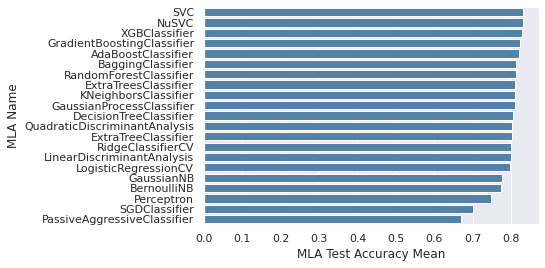

In [22]:
# creating the bar plot of the accuracy score 
sns.barplot(data = MLA_compare, y = 'MLA Name', x = 'MLA Test Accuracy Mean' , color= 'steelblue')

Hyper parameter Tuning 

In [23]:
# Since Suppart Vector Classifier give best score, considering the model and tuning its hyper-parameter  

svc = svm.SVC(probability = True)
base_results = model_selection.cross_validate(svc, titanic_data_train, titanic_train['Survived_code'],
                                              cv = cv_split, return_train_score=True)
svc.fit(titanic_data_train, titanic_train['Survived_code'])
print('Before SVC Parameter: ', svc.get_params())
print('Before SVC Training with bin score mean: {: .2f}'.format(base_results['train_score'].mean()*100) )
print("BEFORE SVC Test with bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE SVC Test with bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

print('_'*50)

#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

tune_model = model_selection.GridSearchCV(svm.SVC(), 
                                          param_grid = param_grid, 
                                          scoring= 'roc_auc', 
                                          cv = cv_split , return_train_score = True)

tune_model.fit(titanic_data_train, titanic_train['Survived_code'])

print('AFTER SVM Parameters: ', tune_model.best_params_)

print("AFTER SVM Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 

print("AFTER SVM Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER SVM Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


Before SVC Parameter:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Before SVC Training with bin score mean:  83.73
BEFORE SVC Test with bin score mean: 82.99
BEFORE SVC Test with bin score 3*std: +/- 4.65
__________________________________________________
AFTER SVM Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
AFTER SVM Training w/bin score mean: 86.74
AFTER SVM Test w/bin score mean: 86.32
AFTER SVM Test w/bin score 3*std: +/- 5.23
----------


In [24]:
svc = svm.SVC(probability = True, C = 1, gamma = .01 )
svc.fit(titanic_data_train, titanic_train['Survived_code'])
titanic_test = titanic[titanic['train'] == 'No' ][['Pclass', 'family_len', 'IsAlone', 'Fare_level', 'Embarked_code','title_code', 'Sex_code', 'Age_code']]
titanic_pred = svc.predict(titanic_test)



Predicting the survived passenger

In [25]:
result = pd.DataFrame({'PassengerId':  titanic[titanic['train'] == 'No' ]['PassengerId'] , 'Survived': titanic_pred})
result.to_csv("Sol.csv", index = False)
result.shape

(418, 2)